In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
train_directory='/content/newexample/train'
test_directory='/content/newexample/test'
val_directory='/content/newexample/valid'

In [7]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

In [8]:
model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [11]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size=(32, 32),
                                                 batch_size=32,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1601 images belonging to 10 classes.
Found 403 images belonging to 10 classes.


In [13]:
len(training_set), len(test_set)

(51, 13)

In [14]:
# Train the model
from tensorflow.keras.utils import to_categorical

r = model.fit(training_set,
              validation_data=test_set,
              epochs=35,#total epochs given are
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set))

Epoch 1/35
51/51 [==============================] - 15s 69ms/step - loss: 2.2423 - accuracy: 0.1618 - val_loss: 2.1252 - val_accuracy: 0.2010
Epoch 2/35
51/51 [==============================] - 2s 38ms/step - loss: 2.0192 - accuracy: 0.2536 - val_loss: 1.9468 - val_accuracy: 0.2779
Epoch 3/35
51/51 [==============================] - 2s 39ms/step - loss: 1.8916 - accuracy: 0.3229 - val_loss: 1.8462 - val_accuracy: 0.3424
Epoch 4/35
51/51 [==============================] - 2s 39ms/step - loss: 1.7992 - accuracy: 0.3592 - val_loss: 1.7466 - val_accuracy: 0.3697
Epoch 5/35
51/51 [==============================] - 2s 43ms/step - loss: 1.7996 - accuracy: 0.3716 - val_loss: 1.6876 - val_accuracy: 0.4069
Epoch 6/35
51/51 [==============================] - 3s 58ms/step - loss: 1.6702 - accuracy: 0.4091 - val_loss: 1.6894 - val_accuracy: 0.4392
Epoch 7/35
51/51 [==============================] - 2s 38ms/step - loss: 1.5680 - accuracy: 0.4622 - val_loss: 1.6284 - val_accuracy: 0.4045
Epoch 8/35
5

In [15]:
model.save('LENETnewmodel1.h5')

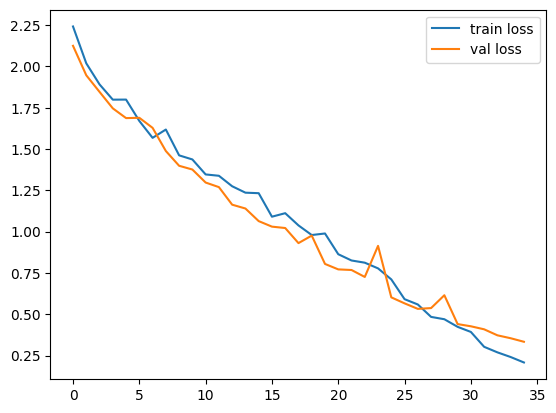

In [16]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

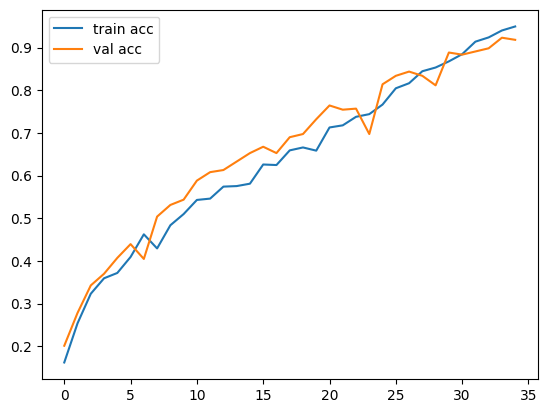

In [17]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

13/13 [==============================] - 1s 32ms/step


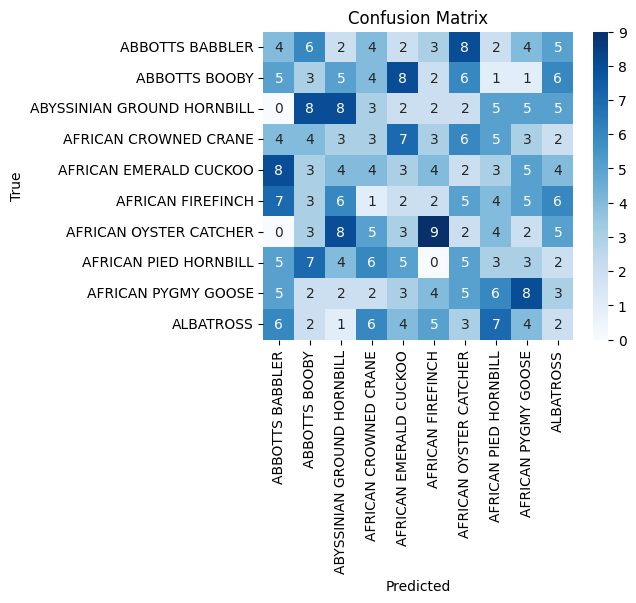

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels for the test set
Y_true = test_set.classes
Y_pred = model.predict(test_set).argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Get class names
class_names = list(test_set.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf

model1 = load_model('./LENETnewmodel1.h5',compile=False)

In [20]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [21]:
def output(location):
    img = tf.keras.preprocessing.image.load_img(location, target_size=(32, 32), color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    img = img.reshape(1, 32, 32, 1)
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    res = lab[y_class[0]]
    return res

1/1 [==============================] - 0s 90ms/step


'ABBOTTS BOOBY'

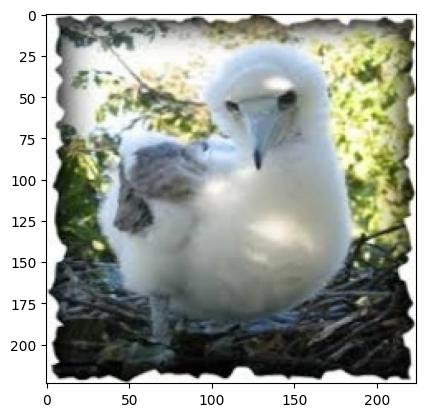

In [22]:
img='/content/newexample/valid/ABBOTTS BOOBY/5.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 21ms/step


'ABYSSINIAN GROUND HORNBILL'

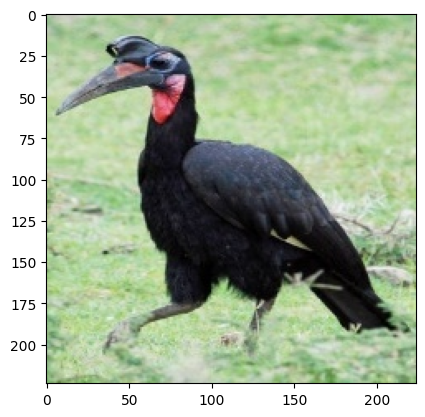

In [23]:
img='/content/newexample/valid/ABYSSINIAN GROUND HORNBILL/3.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 20ms/step


'AFRICAN PIED HORNBILL'

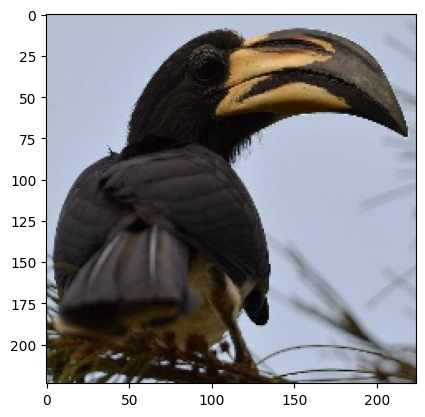

In [24]:
img='/content/newexample/valid/AFRICAN PIED HORNBILL/4.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)